In [105]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns;sns.set()

# Investigating a time-varying criminal network

In [106]:
def read_phase(phase_number):
    '''Given a phase number, return the Graph'''
    phase = pd.read_csv('CAVIAR_Phases/phase'+str(phase_number)+'.csv', index_col=0)
    G = nx.DiGraph()
    for row_index, row in phase.iterrows():
        G.add_node(int(row_index))
        for col_index, value in row.iteritems():
            G.add_node(int(col_index))
            if value != 0:
                G.add_edge(int(row_index), int(col_index), weight=value)
    dic = {}
    dic['degree'] = dict(nx.degree(G))
    dic['betweenness_centrality'] = nx.betweenness_centrality(G)
    dic['eigenvector_centrality'] = nx.eigenvector_centrality(G)
    df = pd.DataFrame.from_dict(dic, orient='index').T
    return df

#OR use this below

# phase1.index = phase1.index.map(str)
# G = nx.from_pandas_adjacency(phase1, create_using=nx.DiGraph)

In [163]:
read_phase(1)

,betweenness_centrality,degree,eigenvector_centrality
64,0.000000,1.0,1.630819e-01
1,0.387363,16.0,4.696576e-01
2,0.000000,1.0,1.630819e-01
3,0.000000,4.0,3.354125e-01
4,0.000000,1.0,1.630819e-01
5,0.000000,1.0,1.630819e-01
6,0.002747,4.0,2.887975e-01
7,0.000000,2.0,6.439337e-02
8,0.000000,1.0,1.630819e-01
83,0.000000,2.0,2.210354e-12


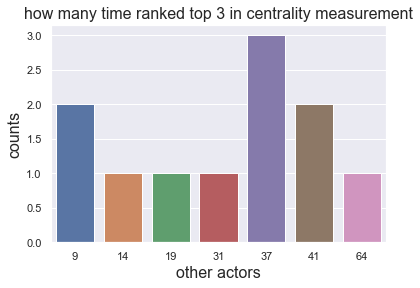

In [167]:
def get_other_important_actors():
    lis = []
    for i in range(1,12):
        lis += list(read_phase(i).sort_values(by='betweenness_centrality', ascending=False)[0:3].index)
        lis += list(read_phase(i).sort_values(by='degree', ascending=False)[0:3].index)
        lis += list(read_phase(i).sort_values(by='eigenvector_centrality', ascending=False)[0:3].index)
    other_actors = [i for i in lis if i not in actor_list]
    sns.countplot(other_actors)
    plt.title('how many time ranked top 3 in centrality measurement', size = 16)
    plt.xlabel('other actors', size=16)
    plt.ylabel('counts', size=16)
get_other_important_actors()

In [159]:
set(read_phase(1).sort_values(by='betweenness_centrality', ascending=False)[0:3].index)

{1, 88, 89}

In [107]:
actor_list = [1,3,83,86,85,6,11,88,106,89,84,5,8,76,77,87,82,96,12,17,80,33,16]
centrailties = ['betweenness_centrality','degree', 'eigenvector_centrality']
phases = ['phase'+str(i) for i in range(1,12)]
whole_data = pd.DataFrame(0, index = actor_list, columns=centrailties)

In [108]:
def plug_into(part, whole):
    for row_index, row in part.iterrows():
        if row_index in actor_list:
            whole.loc[row_index]=row
    return whole

In [109]:
def get_phase_three():
    degree = pd.DataFrame(0, index = actor_list, columns=phases)
    betweenness = pd.DataFrame(0, index = actor_list, columns=phases)
    eigenvector = pd.DataFrame(0, index = actor_list, columns=phases)
    for i in range(1,12):
        whole = pd.DataFrame(0, index = actor_list, columns=centrailties)
        part = read_phase(i)
        result = plug_into(part,whole)
        degree.iloc[:,i-1] = result['degree']
        betweenness.iloc[:,i-1] = result['betweenness_centrality']
        eigenvector.iloc[:,i-1] = result['eigenvector_centrality']
    return (degree, betweenness, eigenvector)

In [110]:
degree,betweenness,eigenvector = get_phase_three()

In [111]:
degree

,phase1,phase2,phase3,phase4,phase5,phase6,phase7,phase8,phase9,phase10,phase11
1,16.0,25.0,36.0,32.0,29.0,30.0,33.0,29.0,14.0,21.0,12.0
3,4.0,3.0,12.0,10.0,7.0,18.0,11.0,17.0,16.0,2.0,1.0
83,2.0,2.0,10.0,10.0,3.0,3.0,4.0,1.0,1.0,3.0,1.0
86,0.0,1.0,7.0,5.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0
85,5.0,2.0,4.0,9.0,4.0,6.0,5.0,5.0,5.0,4.0,5.0
6,4.0,1.0,5.0,2.0,3.0,1.0,2.0,1.0,1.0,0.0,0.0
11,0.0,2.0,3.0,2.0,1.0,2.0,3.0,3.0,1.0,0.0,2.0
88,8.0,4.0,2.0,3.0,2.0,0.0,2.0,0.0,1.0,0.0,1.0
106,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,4.0,4.0,2.0,8.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0


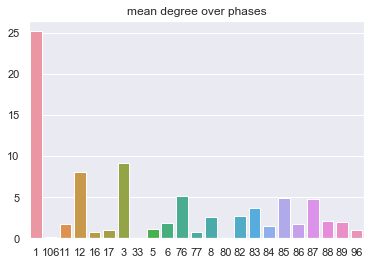

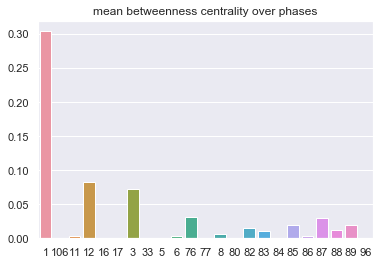

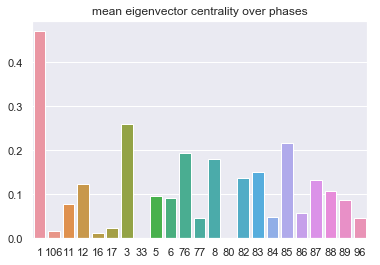

In [112]:
xaxis = map(str, list(degree.index))
plt.figure()
sns.barplot(xaxis, degree.mean(axis=1),)
plt.title('mean degree over phases')
plt.figure()
plt.title('mean betweenness centrality over phases')
sns.barplot(xaxis, betweenness.mean(axis=1))
plt.figure()
plt.title('mean eigenvector centrality over phases')
sns.barplot(xaxis, eigenvector.mean(axis=1))

# Coarse Pattern

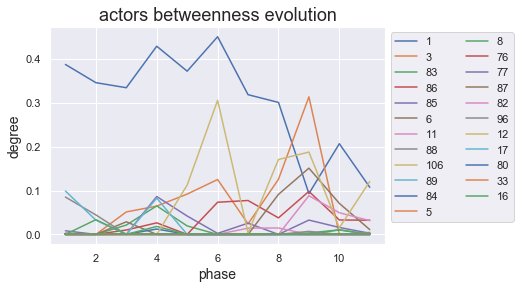

In [147]:
plt.figure()
for i in actor_list:
    plt.plot(range(1,12),betweenness.loc[i,:], label=i)
plt.xlabel('phase',size=14)
plt.ylabel('degree',size=14)
plt.title('actors betweenness evolution', size=18)
plt.legend(bbox_to_anchor=(1,1),ncol=2)

### Evolution for central actors

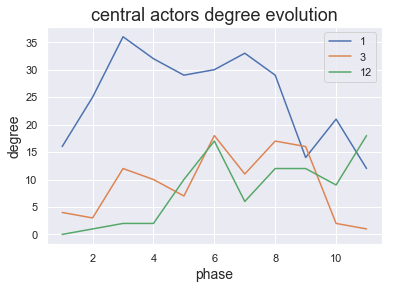

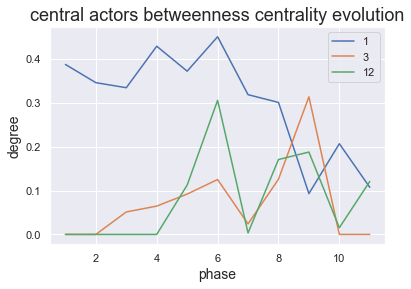

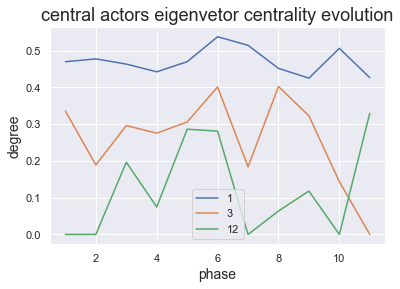

In [143]:
plt.figure()
plt.plot(range(1,12),degree.loc[1,:], label=1)
plt.plot(range(1,12),degree.loc[3,:], label=3)
plt.plot(range(1,12),degree.loc[12,:], label=12)
plt.xlabel('phase',size=14)
plt.ylabel('degree',size=14)
plt.title('central actors degree evolution', size=18)
plt.legend()
plt.figure()
plt.plot(range(1,12),betweenness.loc[1,:], label=1)
plt.plot(range(1,12),betweenness.loc[3,:], label=3)
plt.plot(range(1,12),betweenness.loc[12,:], label=12)
plt.xlabel('phase',size=14)
plt.ylabel('degree',size=14)
plt.title('central actors betweenness centrality evolution', size=18)
plt.legend()
plt.figure()
plt.plot(range(1,12),eigenvector.loc[1,:], label=1)
plt.plot(range(1,12),eigenvector.loc[3,:], label=3)
plt.plot(range(1,12),eigenvector.loc[12,:], label=12)
plt.xlabel('phase',size=14)
plt.ylabel('degree',size=14)
plt.title('central actors eigenvetor centrality evolution', size=18)
plt.legend()

In [132]:
def read_phase_graph(phase_number):
    '''Given a phase number, return the Graph'''
    phase = pd.read_csv('CAVIAR_Phases/phase'+str(phase_number)+'.csv', index_col=0)
    G = nx.DiGraph()
    for row_index, row in phase.iterrows():
        G.add_node(int(row_index))
        for col_index, value in row.iteritems():
            G.add_node(int(col_index))
            if value != 0:
                G.add_edge(int(row_index), int(col_index), weight=value)
    return G
graph_list = [read_phase_graph(i) for i in range(1,12)]

In [140]:
indegree = [graph.in_degree(1, weight = 'weight') for graph in graph_list]
outdegree = [graph.out_degree(1, weight = 'weight') for graph in graph_list]

In [141]:
print indegree
print outdegree

[6, 17, 26, 73, 45, 316, 191, 21, 21, 40, 15]
[29, 92, 191, 256, 80, 137, 100, 162, 74, 78, 22]


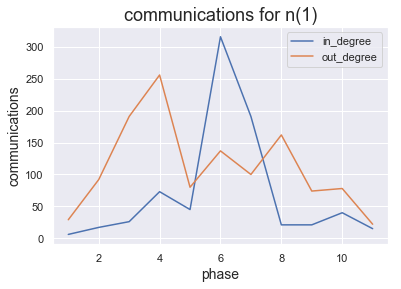

In [142]:
plt.figure()
plt.plot(range(1,12),indegree, label='in_degree')
plt.plot(range(1,12),outdegree, label='out_degree')
plt.xlabel('phase',size=14)
plt.ylabel('communications',size=14)
plt.title('communications for n(1)', size=18)
plt.legend()